In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_x = 5       # num features
T_x = None    # input sequence len
n_y = 2       # num classes 
T_y = 1       # output sequence len

In [3]:
x1 = np.array([
0,0,0,0.2,1.6,
0,0,0,0.2,1.6,
0,1,0,0.3,1.6,
0,0,0,0.3,4.1,
1,1,0,0.3,3.8,
0,1,0,0.3,3.8,
1,1,1,0.5,4.7,
1,1,1,0.6,4.9,
]).reshape(-1, n_x)

In [4]:
# dmg_A, dmg_B

y1 = np.array([
0,0,
0,0,
0,0,
0,0,
0,0,
0,0,
0,0,
1,0,
]).reshape(-1, n_y)

In [5]:
x2 = np.array([
0,0,0,0.01,0.05,
0,0,0,0.01,0.05,
0,0,1,0.04,0.05,
0,0,1,0.01,0.04,
0,0,1,0.01,0.05,
1,0,0,0.01,0.05,
0,1,0,0.04,0.04,
0,0,0,0.01,0.05,
0,0,1,0.01,0.05,
1,0,0,0.01,0.15,
0,0,0,0.01,0.05,
0,0,0,0.01,0.05,
]).reshape(-1, n_x)

In [6]:
# dmg_A, dmg_B

y2 = np.array([
0,0,
0,0,
0,0,
0,0,
0,0,
0,0,
0,0,
0,0,
0,0,
0,0,
0,0,
0,1,
]).reshape(-1, n_y)

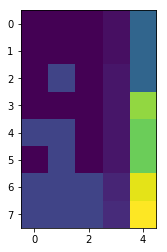

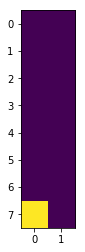

In [7]:
plt.imshow(x1)
plt.show()
plt.imshow(y1)

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

In [9]:
n_x, T_x, n_y, T_y

(5, None, 2, 1)

In [10]:
def make_model(n_x, T_x, n_y, T_y):
    
    tf.keras.backend.clear_session()    
    
    model = Sequential()
    model.add(GRU(32, input_shape=(T_x, n_x)))
    model.add(Dense(n_y, activation="softmax"))

    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    
    return model

In [11]:
model = make_model(n_x, T_x, n_y, T_y)

In [12]:
def transform_sample(x, y):
    
    t = x.shape[0]
    n = x.shape[1]
    
    x_ = x.reshape((1, t, n))
    y_ = y[-1].reshape((1,2))

    return x_, y_


In [13]:
x1_, y1_ = transform_sample(x1, y1)
print(x1_.shape, y1_.shape)

(1, 8, 5) (1, 2)


In [14]:
x2_, y2_ = transform_sample(x2, y2)
print(x1_.shape, y1_.shape)

(1, 8, 5) (1, 2)


In [15]:
model.fit(x1_, y1_)

1/1 [==============================] - 0s 443ms/sample - loss: 0.3110 - accuracy: 1.0000


In [16]:
model.fit(x2_, y2_)

1/1 [==============================] - 0s 7ms/sample - loss: 0.7252 - accuracy: 0.0000e+00


In [17]:
model.predict(x1_)

array([[0.76819944, 0.23180054]], dtype=float32)

# Proper Input Structure

In [18]:
t = tf.constant([[1, 2, 3], [4, 5, 6]])
paddings = tf.constant([[1, 1,], [2, 2]])
tf.pad(t, paddings)

<tf.Tensor: id=1726, shape=(4, 7), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 2, 3, 0, 0],
       [0, 0, 4, 5, 6, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])>

In [19]:
t = tf.constant([[1, 2, 3], [4, 5, 6]])
paddings = tf.constant([[0, 0,], [2, 0]])
tf.pad(t, paddings)

<tf.Tensor: id=1730, shape=(2, 5), dtype=int32, numpy=
array([[0, 0, 1, 2, 3],
       [0, 0, 4, 5, 6]])>

In [20]:
# KERAS generators for batch training:
# https://www.kaggle.com/c/talkingdata-mobile-user-demographics/discussion/22567

In [ ]:
# TODO